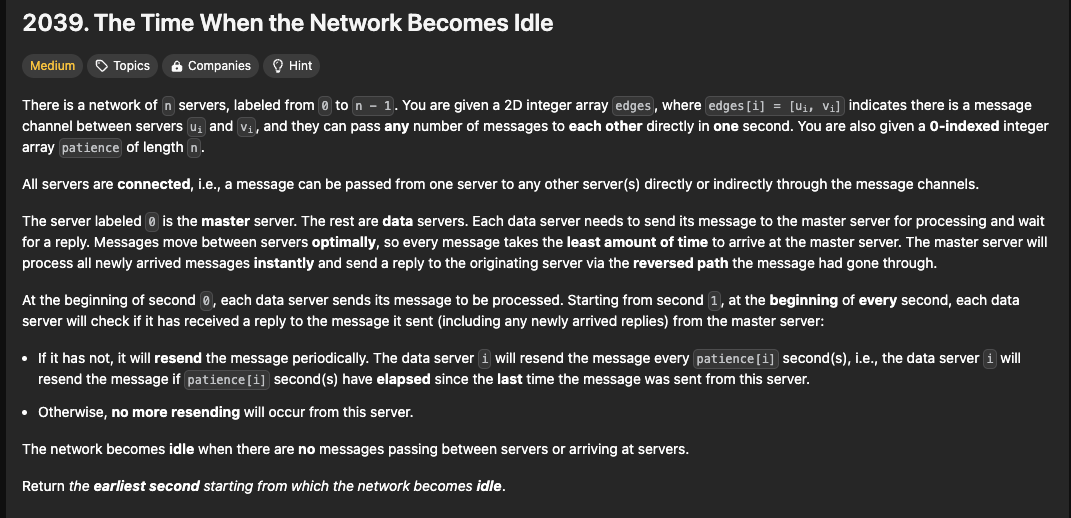

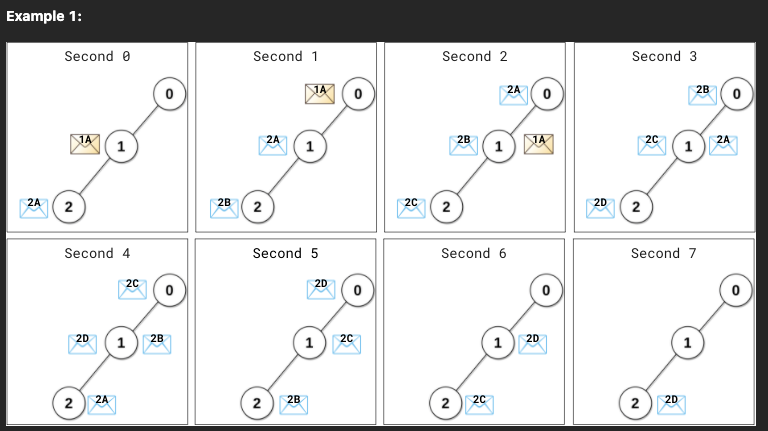

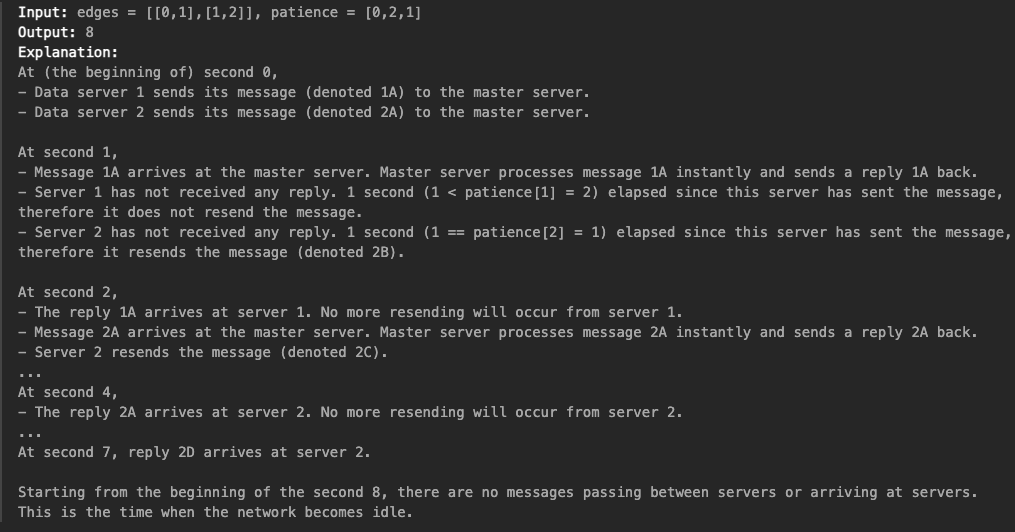

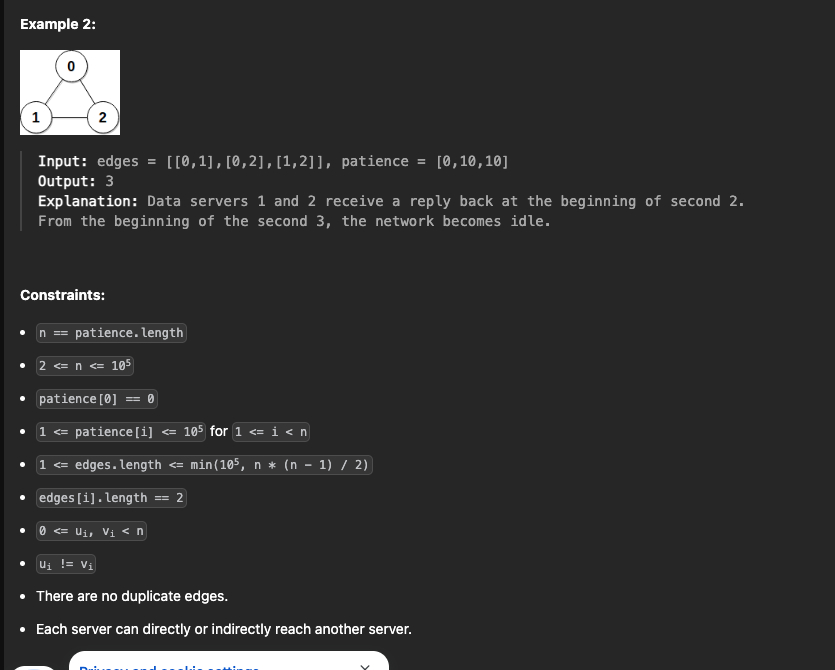

### 1. Create graph representation - adjacency list

In [ ]:
def create_adjacency_list(self, edges: List[List[int]], n: int) -> List[List[int]]:
    adj_list = [[] for _ in range(n)]
    
    for u, v in edges:
        adj_list[u].append(v)
        adj_list[v].append(u)
    return adj_list


### 2. Run BFS - shortest paths from starting point

In [ ]:
def bfs(self, adj_list: List[List[int]], start_vertex: int) -> List[int]:
    n = len(adj_list)
    
    visited =[False for _ in range(n)]
    distances = [float('inf') for _ in range(n)]
    
    distances[0] = 0
    q = deque([0])
    while q:
        vertex = q.popleft()
        if visited[vertex]:
            continue # skip the vertex if it was already visited
        
        visited[vertex] = True
        
        # visit all unvisited neighbors of the vertex and calculate the minimum distance to them
        for neighbor in adj_list[vertex]:
            neighbor_distance = distances[vertex] + 1
            if not visited[neighbor] and neighbor_distance < distances[neighbor]:
                distances[neighbor] = neighbor_distance
                q.append(neighbor)
                
    return distances

### 3. Get the list of shortest distances for each vertex

In [ ]:
from typing import List
import deque


class Solution:
    def network_becomes_idle(self, edges: List[List[int]], patience: List[int]) -> int:
        n = len(patience)
        adj_list = self.create_adjacency_list(edges, len(patience))
        distances = self.bfs(adj_list, 0) # calculate distances from vertex 0 to all other vertices

### 4. Calculate RTT
RTT (Round Trip Time): This is the time it takes for a message to go from your server i to a master server and back. If the distance to a master server is d, the RTT is 2 * d because it includes the trip both ways.

$$
\text{RTT} = 2 \times d
$$

### 5. Patience
Patience: This is how long a server i will wait before resending a message if they haven't received a response.

### 6. Number of messages sent
$$
\text{messages\_sent} = \left\lfloor \frac{\text{rtt} - 1}{\text{patience}[i]} \right\rfloor
$$

### 7. Get the time of the last message sent
$$
\text{last\_message\_time}= messages\_sent \times patience[i]
$$

Why Multiply by patience[i]
When we do integer division (//), we get a count of how many times something can happen. In this case, it's how many full resend intervals fit within the given time frame.

To convert this count back into the actual time, we multiply by the length of each interval, which is patience[i].

Visualizing the Process
Think of the time as a number line:

0---3---6---9---12...

Each tick mark represents an interval of 3 units (the patience value).
After each interval, your friend resends the message.
We found that 3 intervals fit within 9 units of time.
To find out the actual last resend time, we multiply the number of intervals (3) by the length of each interval (3), resulting in 3×3=9.
$$
\text{last\_resend\_time} = number\_of\_intervals \times length\_of\_interval
$$

In [ ]:
def network_becomes_idle(self, edges: List[List[int]], patience: List[int]) -> int:
    n = len(patience)
    adj_list = self.create_adjacency_list(edges, len(patience))
    distances = self.bfs(adj_list, 0) # calculate distances from vertex 0 to all other vertices

    max_time = 0
    for i in range(1, n):
        rtt = 2*distances[i]  # round trip time (the time it takes for a message to be sent back and forth)
        messages_sent = (rtt - 1) // patience[i]  # number of messages sent before the first message is received
        last_message_time = messages_sent * patience[i]
        max_time = max(max_time, rtt + last_message_time)
    return max_time + 1  # earliest second starting from which the network becomes idle

### SOLUTION

In [3]:
# %load ../lc_2039_network_becomes_idle.py
from typing import List
import deque


class Solution:
    def network_becomes_idle(self, edges: List[List[int]], patience: List[int]) -> int:
        n = len(patience)
        adj_list = self.create_adjacency_list(edges, len(patience))
        distances = self.bfs(adj_list, 0) # calculate distances from vertex 0 to all other vertices

        max_time = 0
        for i in range(1, n):
            rtt = 2*distances[i]  # round trip time (the time it takes for a message to be sent back and forth)
            messages_sent = (rtt - 1) // patience[i]  # number of messages sent before the first message is received
            last_message_time = messages_sent * patience[i]
            max_time = max(max_time, rtt + last_message_time)
        return max_time + 1  # earliest second starting from which the network becomes idle
    
    # bfs to calculate the minimum distance from the start_vertex to all other vertices
    def bfs(self, adj_list: List[List[int]], start_vertex: int) -> List[int]:
        n = len(adj_list)
        
        visited =[False for _ in range(n)]
        distances = [float('inf') for _ in range(n)]
        
        distances[0] = 0
        q = deque([0])
        while q:
            vertex = q.popleft()
            if visited[vertex]:
                continue # skip the vertex if it was already visited
            
            visited[vertex] = True
            
            # visit all unvisited neighbors of the vertex and calculate the minimum distance to them
            for neighbor in adj_list[vertex]:
                neighbor_distance = distances[vertex] + 1
                if not visited[neighbor] and neighbor_distance < distances[neighbor]:
                    distances[neighbor] = neighbor_distance
                    q.append(neighbor)
                    
        return distances
    
    
    def create_adjacency_list(self, edges: List[List[int]], n: int) -> List[List[int]]:
        adj_list = [[] for _ in range(n)]
        
        for u, v in edges:
            adj_list[u].append(v)
            adj_list[v].append(u)
        return adj_list
    
    